### Using Pytorch for MNIST dataset Classification Problem

In [1]:
import torch
import torch.nn as nn
import torchvision # datasets 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train = True, transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False, transform = transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([100, 1, 28, 28]) torch.Size([100])


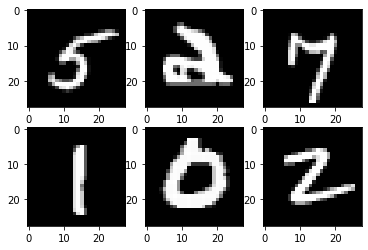

In [5]:
#Dataloader, Transformation
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [6]:
#Multilayer Neural Net, activation function
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

In [7]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [8]:
# Training Loop (batch training)
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss={loss.item():.4f}')

epoch 1 / 2, step 100/600, loss=0.4079
epoch 1 / 2, step 200/600, loss=0.2549
epoch 1 / 2, step 300/600, loss=0.2589
epoch 1 / 2, step 400/600, loss=0.1552
epoch 1 / 2, step 500/600, loss=0.2024
epoch 1 / 2, step 600/600, loss=0.1953
epoch 2 / 2, step 100/600, loss=0.1064
epoch 2 / 2, step 200/600, loss=0.1507
epoch 2 / 2, step 300/600, loss=0.1040
epoch 2 / 2, step 400/600, loss=0.2734
epoch 2 / 2, step 500/600, loss=0.1345
epoch 2 / 2, step 600/600, loss=0.2238


In [9]:
# Model evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100 * n_correct / n_samples
    print(f'Accuracy = {acc}')

Accuracy = 95.53
